In [11]:
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import pairwise_distances
import numpy as np
from scipy.spatial.distance import jaccard

import seaborn as sns
import matplotlib.pyplot as plt

## Data


In [12]:
#| label: tbl-data
#| tbl-cap: Binary response data. 1 indicates policy implementation.
cols = [*[f"Gather{i+1}" for i in range(4)], "Mask1", "Mask2", "Curfew", "School"]
df = pd.read_csv("./Response.csv").set_index("Time")[[*cols, "State"]].fillna(0)
df.sample(10)

,Gather1,Gather2,Gather3,Gather4,Mask1,Mask2,Curfew,School,State
Time,,,,,,,,,
7/1/2020,0.0,1.0,0.0,1.0,0.0,1,0.0,1.0,OH
4/1/2015,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,AL
3/1/2012,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,ME
10/1/2020,0.0,0.0,1.0,0.0,1.0,1,0.0,1.0,CT
4/1/2012,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,PA
7/1/2017,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,SC
2/1/2022,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,RI
1/1/2020,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,WI
11/1/2012,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,AK


In [25]:
def hamming_similarity_matrix(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    """
    Calculate a similarity matrix using Hamming Distance.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list[str]): The list of columns to use for similarity computation.

    Returns:
        pd.DataFrame: A DataFrame containing the similarity matrix.
    """
    states = df["State"].unique()
    df_pivot = df.pivot_table(index="State", values=columns, aggfunc="mean")
    hamming_distances = pairwise_distances(df_pivot, metric="hamming")
    similarity_matrix = 1 - hamming_distances  # Convert distances to similarity
    return pd.DataFrame(similarity_matrix, index=states, columns=states)


def jaccard_similarity_matrix(df: pd.DataFrame, columns: list[str]) -> pd.DataFrame:
    """
    Calculate a similarity matrix using Jaccard Similarity.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        columns (list[str]): The list of columns to use for similarity computation.

    Returns:
        pd.DataFrame: A DataFrame containing the similarity matrix.
    """
    states = df["State"].unique()
    df_pivot = df.pivot_table(index="State", values=columns, aggfunc="mean")
    jaccard_distances = pairwise_distances(df_pivot, metric=jaccard)
    similarity_matrix = 1 - jaccard_distances  # Convert distances to similarity
    return pd.DataFrame(similarity_matrix, index=states, columns=states)


def plot_heatmap(similarity_matrix: pd.DataFrame, title: str, cmap: str = "viridis") -> None:
    """
    Plot a heatmap of the similarity matrix.

    Args:
        similarity_matrix (pd.DataFrame): The similarity matrix to plot.
        title (str): The title of the heatmap.
        cmap (str): The color map to use for the heatmap.
    """
    plt.figure(figsize=(16, 10))
    sns.heatmap(similarity_matrix, annot=True, fmt=".1f", cmap=cmap, cbar=True, square=True,
                linewidths=.5, linecolor='black', annot_kws={"size": 6})
    plt.title(title, fontsize=18)
    plt.xlabel('State', fontsize=14)
    plt.ylabel('State', fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()

### Hamming Distance and Jaccard Similarity

In [22]:
#| label: tbl-ham
#| tbl-cap: Example of Hamming Distance
hamdf = hamming_similarity_matrix(df, cols)
hamdf.head()

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
AK,1.000,0.125,0.250,0.250,0.125,0.125,0.125,0.125,0.250,0.250,...,0.250,0.250,0.125,0.250,0.250,0.375,0.125,0.250,0.125,0.375
AL,0.125,1.000,0.250,0.250,0.250,0.375,0.250,0.250,0.375,0.375,...,0.375,0.250,0.250,0.250,0.250,0.125,0.125,0.125,0.375,0.375
AR,0.250,0.250,1.000,0.375,0.375,0.250,0.250,0.250,0.375,0.250,...,0.375,0.375,0.500,0.375,0.375,0.375,0.375,0.375,0.250,0.250
AZ,0.250,0.250,0.375,1.000,0.500,0.250,0.250,0.250,0.625,0.625,...,0.625,0.625,0.250,0.250,0.250,0.125,0.250,0.250,0.250,0.250
CA,0.125,0.250,0.375,0.500,1.000,0.250,0.250,0.250,0.375,0.250,...,0.500,0.500,0.250,0.250,0.375,0.125,0.375,0.375,0.375,0.250


In [23]:
#| label: tbl-jaccard
#| tbl-cap: Example of Jaccard Similarity
jacdf = jaccard_similarity_matrix(df, cols)
jacdf.head()

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
AK,1.000000,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.142857,0.142857,0.285714,0.000000,0.142857,0.000000,0.285714
AL,0.000000,1.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.166667,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667
AR,0.142857,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.333333,0.166667,0.166667,0.285714,0.166667,0.166667,0.000000,0.000000
AZ,0.000000,0.0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.0,0.250000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CA,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,0.166667,0.166667,0.000000


## Heatmap

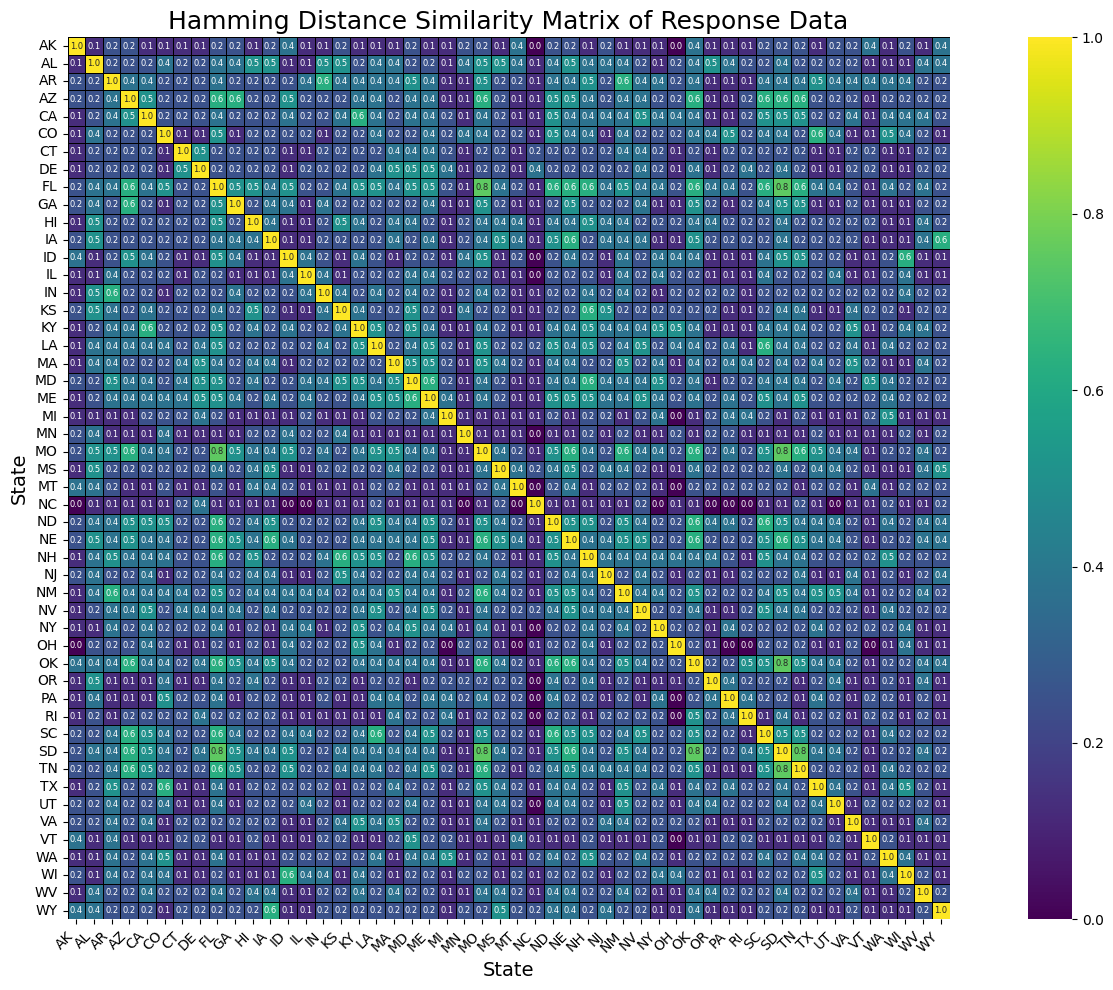

In [26]:
#| label: fig-hamming
#| fig-cap: Hamming Distance
plot_heatmap(hamdf, 'Hamming Distance Similarity Matrix of Response Data')

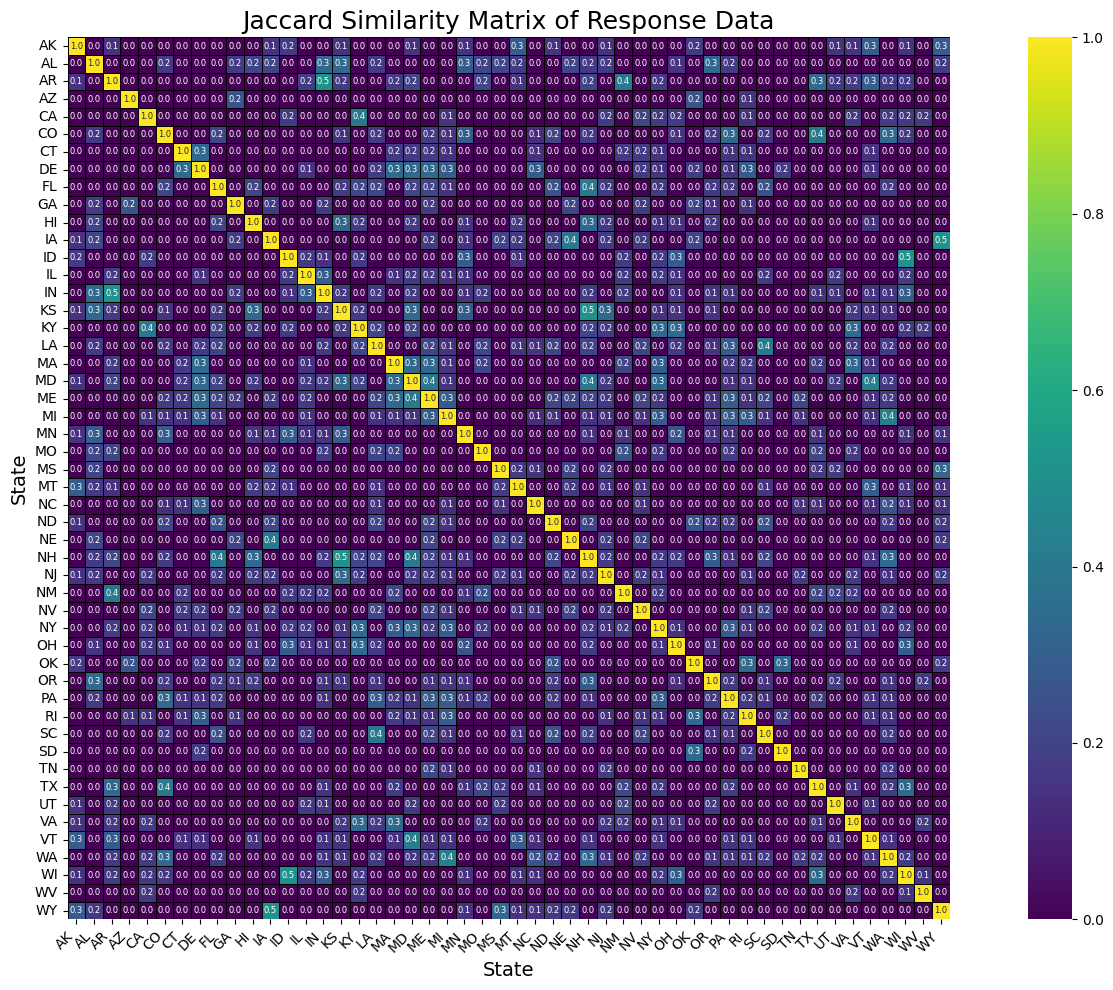

In [28]:
#| label: fig-jaccard
#| fig-cap: Jaccard Distance
plot_heatmap(jacdf, 'Jaccard Similarity Matrix of Response Data')